## Librerías

In [1]:
import numpy
import pandas as pd
from sklearn.manifold import MDS
from datetime import date,datetime
from dateutil.relativedelta import relativedelta as rd
import seaborn as sns
%matplotlib inline

## Carga de Datos

In [2]:
df = pd.read_excel('data/churn.xlsx')

In [3]:
df.shape

(2801, 14)

In [4]:
df.head()

,V_ACCT_LGHT,C_IP,C_VMP,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS,TARGET,ID
0,128,No,Yes,25,45.07,99,16.78,91,11.01,3,2.70,1,0,1
1,107,No,Yes,26,27.47,103,16.62,103,11.45,3,3.70,1,0,2
2,137,No,No,0,41.38,110,10.30,104,7.32,5,3.29,0,0,3
3,65,No,No,0,21.95,83,19.42,111,9.40,6,3.43,4,1,11
4,168,No,No,0,21.90,71,8.92,128,6.35,2,3.02,1,0,13


## Análisis Básico

In [5]:
df.head()

,V_ACCT_LGHT,C_IP,C_VMP,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS,TARGET,ID
0,128,No,Yes,25,45.07,99,16.78,91,11.01,3,2.70,1,0,1
1,107,No,Yes,26,27.47,103,16.62,103,11.45,3,3.70,1,0,2
2,137,No,No,0,41.38,110,10.30,104,7.32,5,3.29,0,0,3
3,65,No,No,0,21.95,83,19.42,111,9.40,6,3.43,4,1,11
4,168,No,No,0,21.90,71,8.92,128,6.35,2,3.02,1,0,13


In [6]:
df.describe()

,V_ACCT_LGHT,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS,TARGET,ID
count,2801.000000,2801.000000,2801.000000,2801.000000,2801.000000,2801.000000,2801.000000,2801.000000,2801.000000,2801.000000,2801.000000,2801.000000
mean,101.033559,7.805784,30.545812,100.234559,17.108693,100.231703,9.025773,4.443770,2.778911,1.544448,0.135309,1674.363442
std,37.575889,13.349831,8.630344,18.625260,4.043765,18.488439,2.132611,2.276855,0.684567,1.267832,0.342114,957.140286
min,12.000000,0.000000,8.810000,53.000000,6.740000,57.000000,3.570000,1.000000,0.890000,0.000000,0.000000,1.000000
25%,74.000000,0.000000,24.480000,87.000000,14.220000,87.000000,7.520000,3.000000,2.320000,1.000000,0.000000,843.000000
50%,101.000000,0.000000,30.460000,100.000000,17.200000,100.000000,9.040000,4.000000,2.780000,1.000000,0.000000,1684.000000
75%,127.000000,18.000000,36.670000,113.000000,19.980000,113.000000,10.540000,6.000000,3.240000,2.000000,0.000000,2495.000000
max,195.000000,43.000000,51.880000,147.000000,27.120000,147.000000,14.300000,13.000000,4.510000,6.000000,1.000000,3333.000000


array([[<AxesSubplot:title={'center':'V_ACCT_LGHT'}>,
        <AxesSubplot:title={'center':'V_N_VM_MESS'}>,
        <AxesSubplot:title={'center':'V_T_DAY_CHG'}>],
       [<AxesSubplot:title={'center':'V_T_EVE_CALLS'}>,
        <AxesSubplot:title={'center':'V_T_EVE_CHG'}>,
        <AxesSubplot:title={'center':'V_T_NIG_CALLS'}>],
       [<AxesSubplot:title={'center':'V_T_NIG_CHG'}>,
        <AxesSubplot:title={'center':'V_T_INT_CALLS'}>,
        <AxesSubplot:title={'center':'V_T_INT_CHG'}>],
       [<AxesSubplot:title={'center':'V_CS_CALLS'}>,
        <AxesSubplot:title={'center':'TARGET'}>,
        <AxesSubplot:title={'center':'ID'}>]], dtype=object)

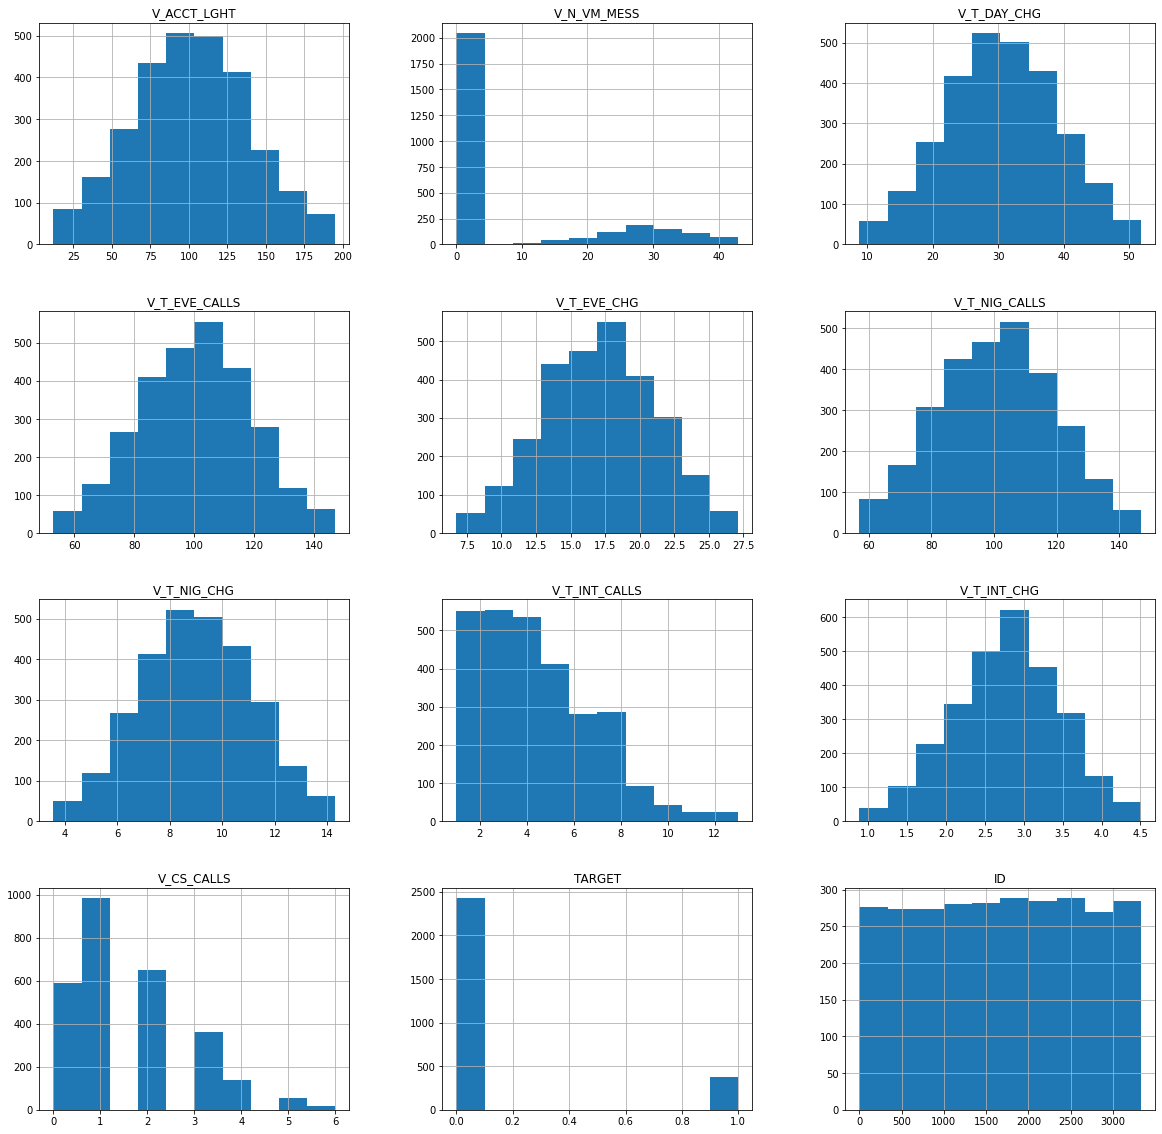

In [7]:
df.hist(figsize=(20,20))

In [8]:
df['TARGET'].value_counts(True)

0    0.864691
1    0.135309
Name: TARGET, dtype: float64

## Reducción de Dimensiones

### Definición de escala de variables

In [9]:
varc = [v for v in df.columns if v[:2]=='V_']
vard = [v for v in df.columns if v[:2]=='C_']

In [10]:
len(varc)

10

### Matriz de Trabajo

In [11]:
X = df[varc].copy()

In [12]:
X.head()

,V_ACCT_LGHT,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS
0,128,25,45.07,99,16.78,91,11.01,3,2.70,1
1,107,26,27.47,103,16.62,103,11.45,3,3.70,1
2,137,0,41.38,110,10.30,104,7.32,5,3.29,0
3,65,0,21.95,83,19.42,111,9.40,6,3.43,4
4,168,0,21.90,71,8.92,128,6.35,2,3.02,1


### MDS

In [13]:
mds = MDS(n_components=2,n_jobs=-1)

In [15]:
X = pd.DataFrame(mds.fit_transform(X),columns=['d1','d2'])

### Visualización en dos dimensiones

In [22]:
X['TARGET'] = df['TARGET']
X['C_VMP'] = df['C_VMP']

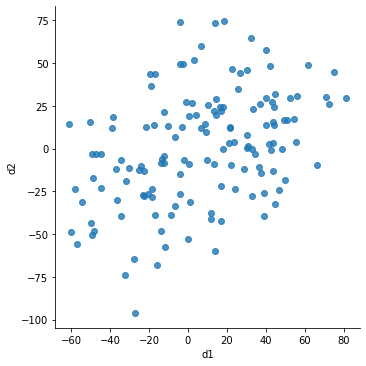

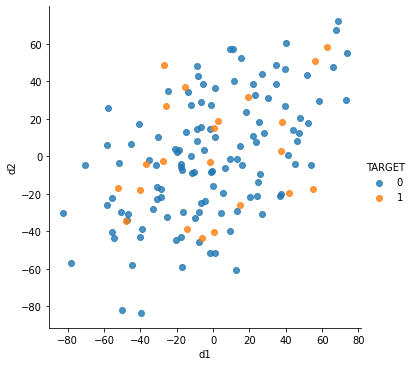

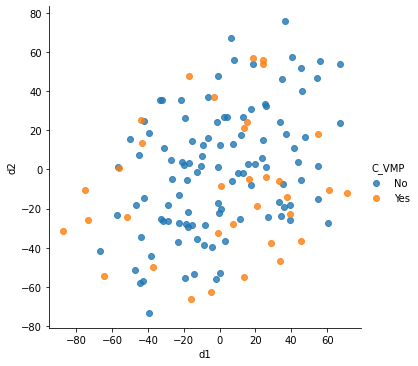

In [23]:
sns.lmplot(data=X.sample(frac=0.05),x='d1',y='d2',fit_reg=False)
sns.lmplot(data=X.sample(frac=0.05),x='d1',y='d2',fit_reg=False,hue='TARGET')
sns.lmplot(data=X.sample(frac=0.05),x='d1',y='d2',fit_reg=False,hue='C_VMP')